# Program 11

# Max Filter

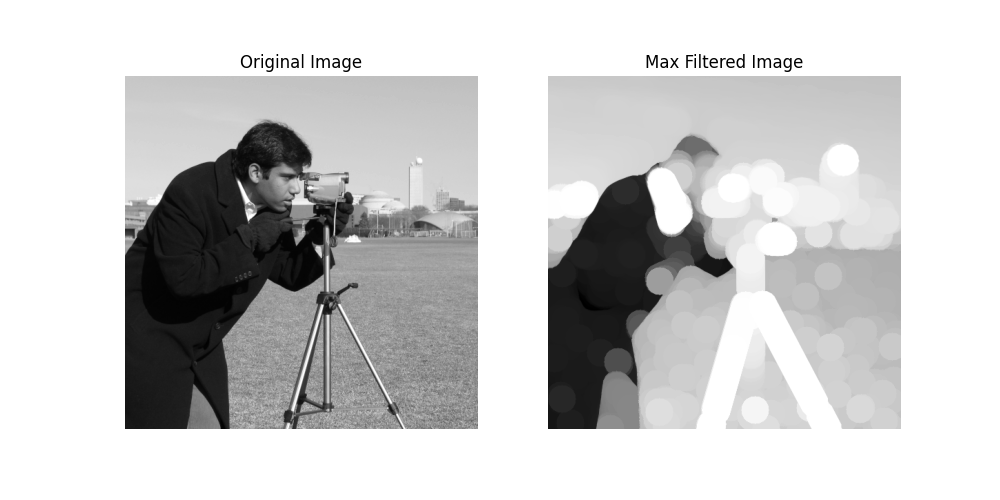

In [19]:
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.filters import rank
from skimage.morphology import disk
from skimage.util import img_as_ubyte

# Load example image and convert to float
image = img_as_ubyte(data.camera())

# Apply Max Filter
max_filtered = rank.maximum(image, disk(20))

# Plot the original and filtered image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(max_filtered, cmap='gray')
ax[1].set_title("Max Filtered Image")
ax[1].axis('off')

plt.show()


# Convolutional Filters

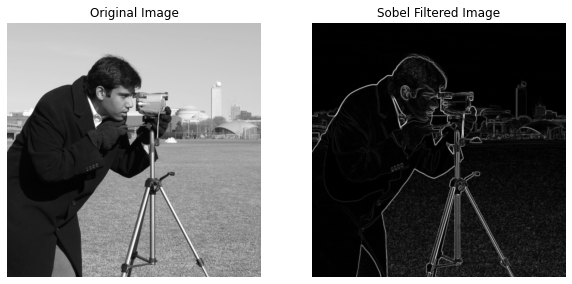

In [2]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import sobel

# Load example image
image = data.camera()

# Apply Sobel filter (edge detection)
sobel_filtered = sobel(image)

# Plot the original and Sobel filtered image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(sobel_filtered, cmap='gray')
ax[1].set_title("Sobel Filtered Image")
ax[1].axis('off')

plt.show()


# Gaussian filtering

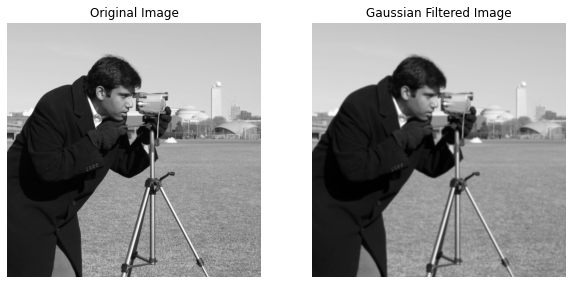

In [3]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import gaussian

# Load example image
image = data.camera()

# Apply Gaussian filter with sigma=1
gaussian_filtered = gaussian(image, sigma=1)

# Plot the original and Gaussian filtered image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(gaussian_filtered, cmap='gray')
ax[1].set_title("Gaussian Filtered Image")
ax[1].axis('off')

plt.show()


# Program 12

# Thresholding

In [4]:
pip install ipympl


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from skimage import io
import imageio.v3 as iio
import ipympl
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

In [6]:
%matplotlib widget

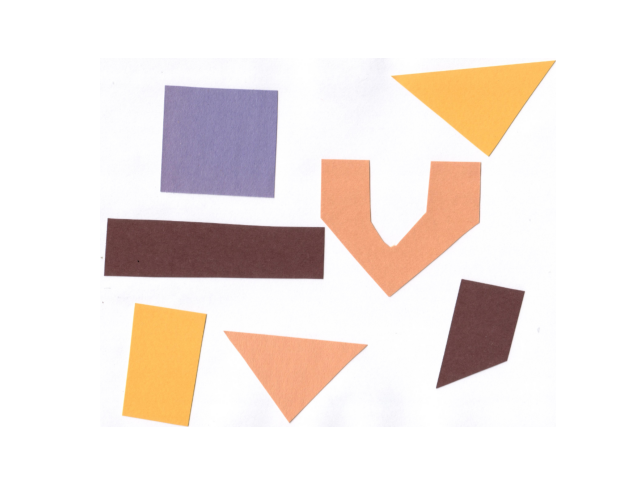

In [7]:
# Load the image
shapes01 = iio.imread(uri="C:/Users/XyloCrafts/Desktop/shapes.png")

# Create a figure and axis to display the image
fig, ax = plt.subplots()
ax.imshow(shapes01)
ax.axis('off')

# Display the image on the screen
plt.show()


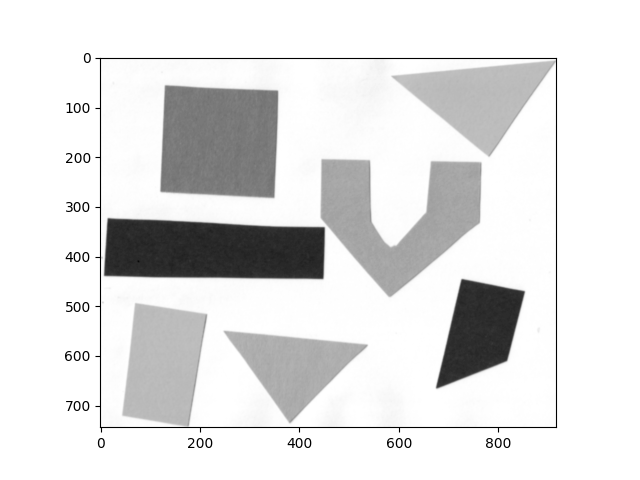

In [8]:
# Remove the alpha channel if present (RGBA -> RGB)
if shapes01.shape[-1] == 4:
    shapes01 = shapes01[:, :, :3] 

# convert the image to grayscale
gray_shapes = ski.color.rgb2gray(shapes01)
   
# blur the image to denoise
blurred_shapes = ski.filters.gaussian(gray_shapes, sigma=1.0)

fig, ax = plt.subplots()
ax.imshow(blurred_shapes, cmap="gray")

(0.0, 1.0)

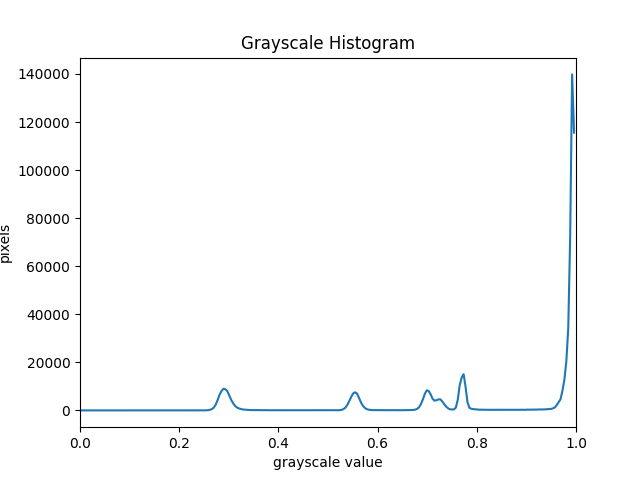

In [9]:
# create a histogram of the blurred grayscale image
histogram, bin_edges = np.histogram(blurred_shapes, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
ax.plot(bin_edges[0:-1], histogram)
ax.set_title("Grayscale Histogram")
ax.set_xlabel("grayscale value")
ax.set_ylabel("pixels")
ax.set_xlim(0, 1.0)

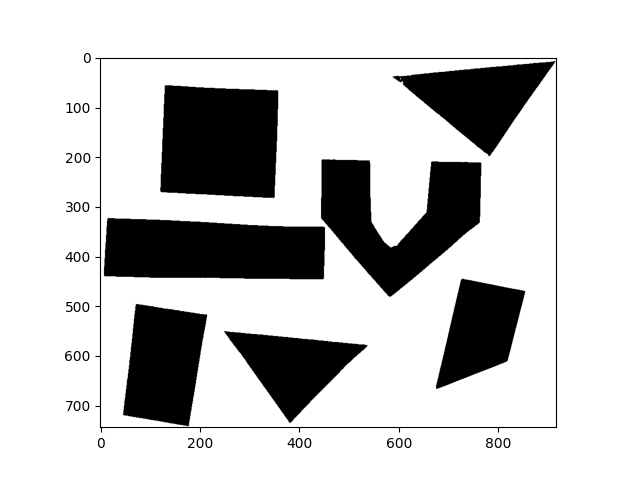

In [20]:
# create a mask based on the threshold
t = 0.8
binary_mask = blurred_shapes > t

fig, ax = plt.subplots()
ax.imshow(binary_mask, cmap="gray")

# Second Part Automatic Threshold Selection

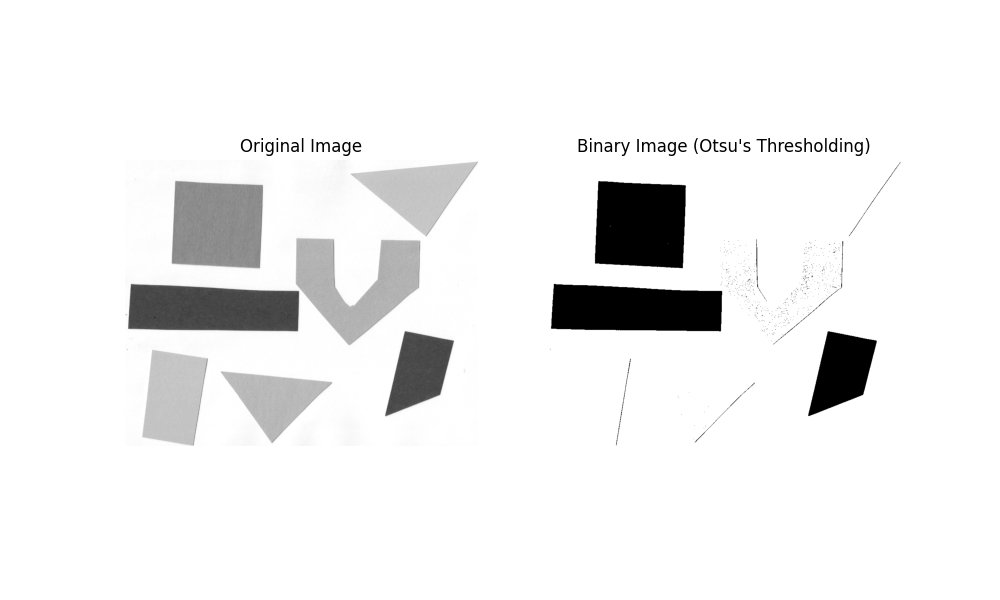

In [21]:
import matplotlib.pyplot as plt
import imageio.v3 as iio
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte

# Load the image
image_path = "C:/Users/XyloCrafts/Desktop/shapes.png"
image = iio.imread(image_path)

# Convert the image to grayscale (if not already)
if image.ndim == 3 and image.shape[2] == 4:  # RGBA image
    image = image[:, :, :3]  # Remove alpha channel
if image.ndim == 3:  # RGB image
    image = rgb2gray(image)  # Convert to grayscale

# Ensure the image is in 8-bit format
image = img_as_ubyte(image)

# Compute Otsu's threshold value
threshold_value = threshold_otsu(image)

# Apply the threshold to get a binary image
binary_image = image > threshold_value

# Display the original and binary images
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(binary_image, cmap='gray')
ax[1].set_title("Binary Image (Otsu's Thresholding)")
ax[1].axis('off')

plt.show()


# Program 13

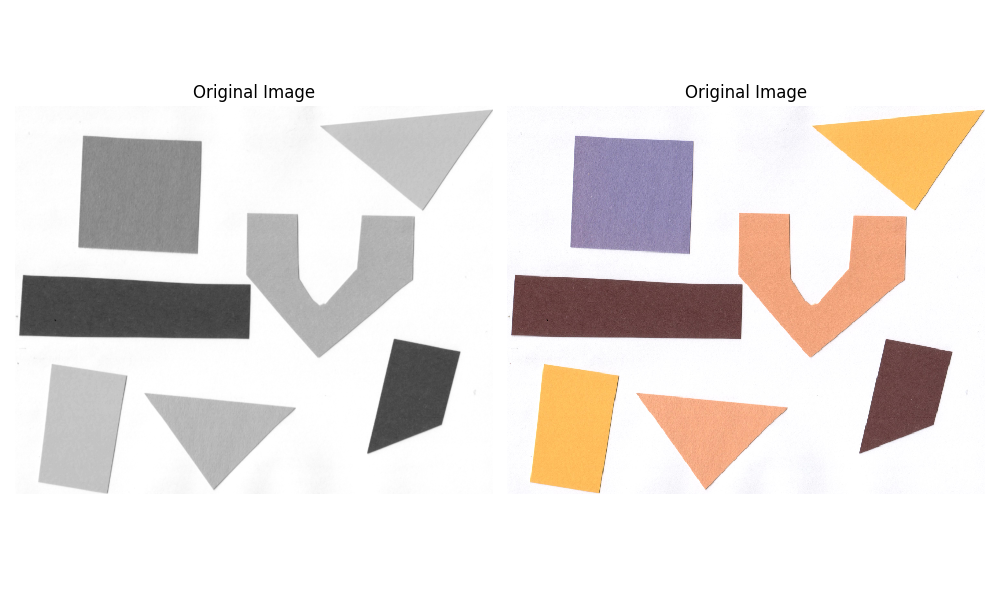

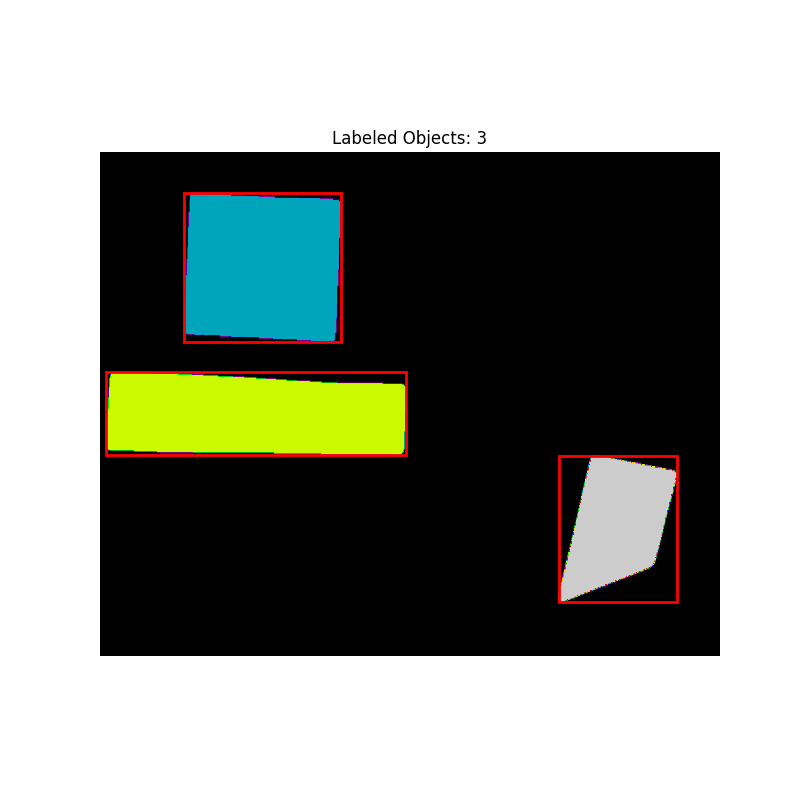

In [22]:
# Load necessary libraries
import skimage.io
import skimage.color
import skimage.filters
import numpy as np
import skimage.measure
import skimage.morphology as morph
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load and display the image
image_path = "C:/Users/XyloCrafts/Desktop/shapes.png"
LOAD_IMAGE = skimage.io.imread(image_path)

# Check if the image has an alpha channel and remove it if necessary
if LOAD_IMAGE.shape[-1] == 4:  # Image has an alpha channel
    LOAD_IMAGE = LOAD_IMAGE[:, :, :3]  # Discard the alpha channel

skimage.io.imshow(LOAD_IMAGE)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Turn the image to grayscale
gray_LOAD_IMAGE = skimage.color.rgb2gray(LOAD_IMAGE)

# Denoise the image
blurred_LOAD_IMAGE = skimage.filters.gaussian(gray_LOAD_IMAGE, sigma=4)

# Apply a threshold
threshold = threshold_value = threshold_otsu(blurred_LOAD_IMAGE)
binary_mask = blurred_LOAD_IMAGE < threshold

# Create an all-zero values array with the same shape as our binary mask
image = np.zeros(shape=binary_mask.shape)

# Apply the mask to the array. Only detected objects will be shown as white (value of 1),
# the rest will be set to black (value of 0)
image[binary_mask] = 1

# Remove small objects from the binary image
cleaned_image = morph.remove_small_objects(image.astype(bool), min_size=100)

# Perform Connected Component Analysis (CCA) on the cleaned image
labels = skimage.measure.label(cleaned_image)

# Count the number of remaining objects
object_count = labels.max()

# Display the labeled objects
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(labels, cmap='nipy_spectral')
ax.set_title(f'Labeled Objects: {object_count}')
ax.axis('off')

# Optionally, highlight bounding boxes for each object
for region in skimage.measure.regionprops(labels):
    # Draw a rectangle around the segmented objects
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

plt.show()


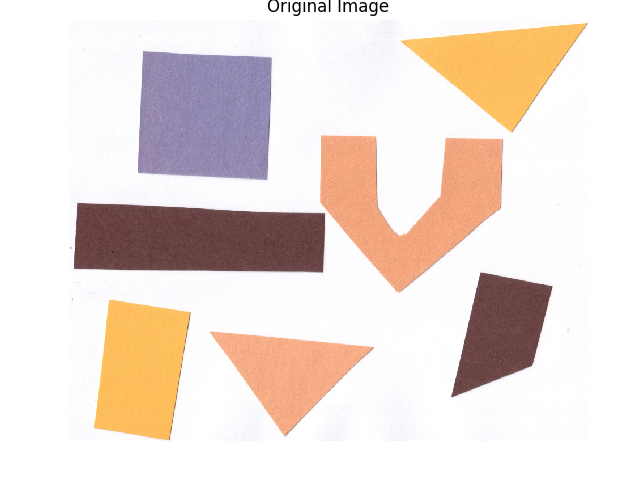

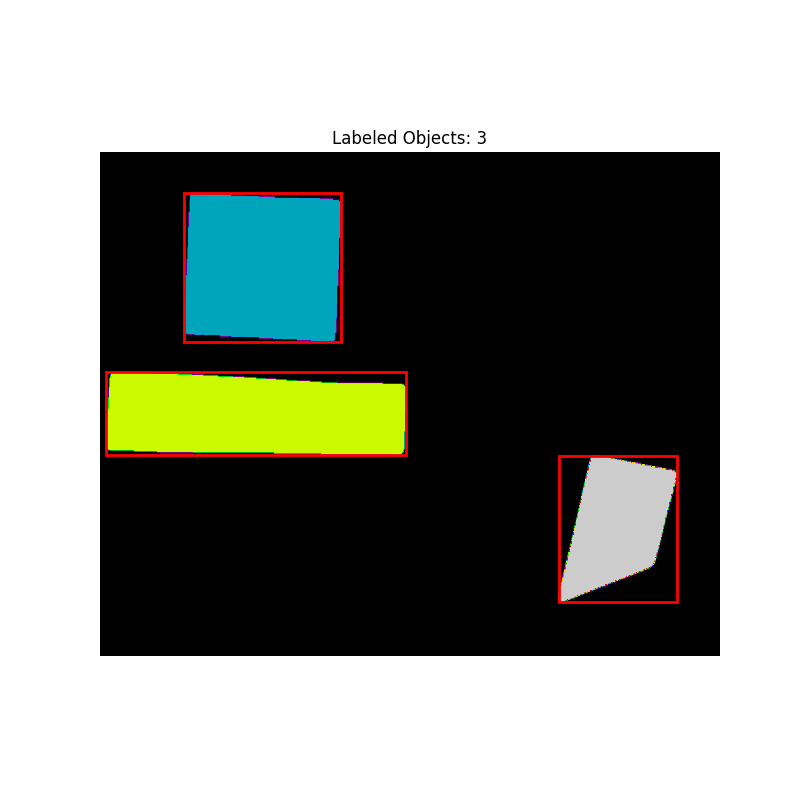

Total objects detected: 3

Object 1:
  Area: 46938.0
  Bounding Box: (60, 124, 280, 356)
  Centroid: (169.6023051685202, 239.92436831565044)
  Eccentricity: 0.3627467714077433
  Perimeter: 870.7106781186548

Object 2:
  Area: 48543.0
  Bounding Box: (324, 9, 447, 452)
  Centroid: (388.4229240055209, 225.6333353933626)
  Eccentricity: 0.9677449395414195
  Perimeter: 1099.2964645562815

Object 3:
  Area: 23926.0
  Bounding Box: (448, 677, 664, 852)
  Centroid: (548.7721725319736, 762.7459667307531)
  Eccentricity: 0.7939880174245819
  Perimeter: 681.3452377915607



In [13]:
# Import necessary libraries
import skimage.io
import skimage.color
import skimage.filters
import numpy as np
import skimage.measure
import skimage.morphology as morph
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.filters import threshold_otsu

# Load and display the image
image_path = "C:/Users/XyloCrafts/Desktop/shapes.png"
LOAD_IMAGE = skimage.io.imread(image_path)

# Check if the image has an alpha channel and remove it if necessary
if LOAD_IMAGE.shape[-1] == 4:  # Image has an alpha channel
    LOAD_IMAGE = LOAD_IMAGE[:, :, :3]  # Discard the alpha channel

# Display the original image
plt.figure()
skimage.io.imshow(LOAD_IMAGE)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Step 1: Convert the image to grayscale
gray_LOAD_IMAGE = skimage.color.rgb2gray(LOAD_IMAGE)

# Step 2: Denoise the image using a Gaussian filter
blurred_LOAD_IMAGE = skimage.filters.gaussian(gray_LOAD_IMAGE, sigma=4)

# Step 3: Apply Otsu's thresholding to convert it into a binary image
threshold = threshold_otsu(blurred_LOAD_IMAGE)
binary_mask = blurred_LOAD_IMAGE < threshold

# Step 4: Create an all-zero values array with the same shape as the binary mask
image = np.zeros(shape=binary_mask.shape)

# Step 5: Apply the mask to the array (detected objects will be white, rest will be black)
image[binary_mask] = 1

# Step 6: Remove small objects from the binary image
cleaned_image = morph.remove_small_objects(image.astype(bool), min_size=100)

# Step 7: Perform Connected Component Analysis (CCA) on the cleaned image
labels = skimage.measure.label(cleaned_image)

# Step 8: Count the number of remaining objects
object_count = labels.max()

# Step 9: Display the labeled objects
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(labels, cmap='nipy_spectral')
ax.set_title(f'Labeled Objects: {object_count}')
ax.axis('off')

# Step 10: Optionally, highlight bounding boxes for each object
for region in skimage.measure.regionprops(labels):
    # Draw a rectangle around the segmented objects
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

plt.show()

# Step 11: Print properties of each labeled object
print(f"Total objects detected: {object_count}\n")
for i, region in enumerate(skimage.measure.regionprops(labels)):
    print(f"Object {i + 1}:")
    print(f"  Area: {region.area}")
    print(f"  Bounding Box: {region.bbox}")
    print(f"  Centroid: {region.centroid}")
    print(f"  Eccentricity: {region.eccentricity}")
    print(f"  Perimeter: {region.perimeter}\n")
